Ref: https://www.youtube.com/shorts/-qvC0ISkp1k

In [1]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
def do_experiment(participants, head_probability):
    return np.random.binomial(participants, head_probability, size=None)

In [3]:
def perform_game(initial, head_probability):
    steps = 0
    while initial > 1:
        initial = do_experiment(initial, head_probability)
        steps += 1
    return steps, initial

In [24]:
def do_maths(N, inital, p_head):
    count = 0
    for _ in range(N):
        _, final = perform_game(inital, p_head)
        if final == 1:
            count += 1
    return 100*count/N

In [25]:
values = []

N = 10000
for i in tqdm(range(1, 9* N//10)):
    values.append(do_maths(1000, 10000, i/N))

  0%|          | 0/8999 [00:00<?, ?it/s]

In [26]:
def moving_average(values, window_size):
    final = []
    for i in range(len(values)):
        l, h = max(0, i-window_size), i+1
        subset = values[l:h]
        final.append(sum(subset)/len(subset))
    return final

Text(0.5, 1.0, 'Coin Experiment, 10000 ppl, 1000 per bias, Moving Average (Window=50)')

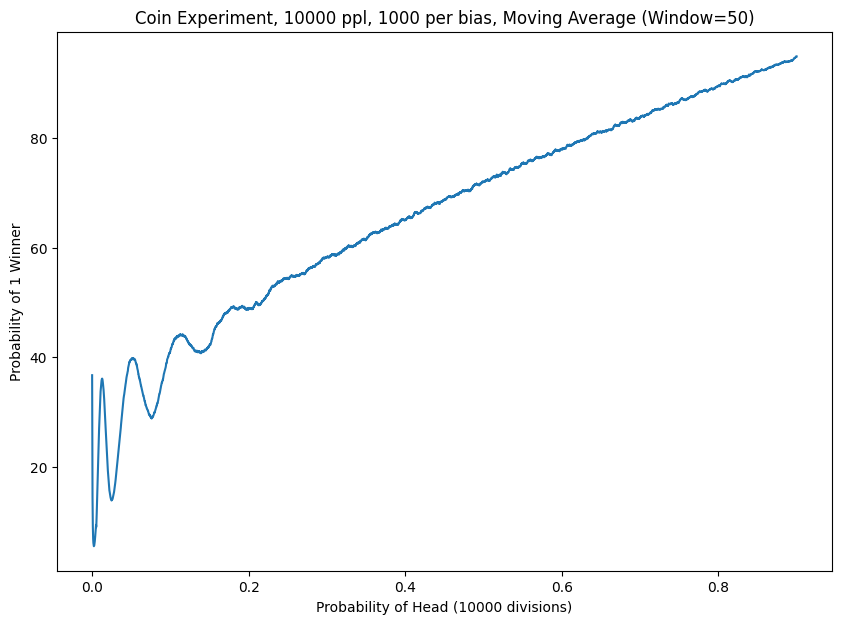

In [27]:
plt.figure(figsize=(10, 7))
plt.plot([i/N for i in range(1, 9* N//10)], moving_average(values, 50))
plt.xlabel("Probability of Head (10000 divisions)")
plt.ylabel("Probability of 1 Winner")
plt.title(
    "Coin Experiment, 10000 ppl, 1000 per bias, Moving Average (Window=50)")

In [231]:
values[500]

73.3